what is adversarial attack and why is it dangerous?

#Adversarial attacks are small, carefully crafted perturbations to input data that lead to high rates of misclassification for machine learning models, while the data seems to be identical to the original for human observers.

#hink of it like twins. One has medium sized hair and another does have medium sized hair owever, the length may differ. One gets blamed for something he didnt do even though when he recieves that information, he wont know what in the world is he listening so the final judgement output would be blamed on him, which is wrong. Thesse mistakes are extremely dangerous ESPECIALLY IN THE MEDICAL or CYBERSECURITY sector. I may be wrong but lets say that when they detect a tumor (Gliomal, Meningliomal or pituitary), they may identify a different tymor WHY? because of that little mishap along the way so the patient will be treated differently even though that tumor could be differnt OR not a tumor at all. Even for cyber secuirty, something which can be considered a SCAM, due to this adversible attack, the QC may pressume it is not something fishy or stuff and will actually place it through (transactions are core here)...   

#how can we prevent such adversarial attacks

#1) we first import the necessary modules 

my necessary modules are numpy, matplotlb, torch, pennylane

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pennylane as qml
from pennylane import numpy as pnp

What are [PlusMinus] data set

plus minus data set consists for grayscale 16 x 16 images which consists of 

#1) + [plus dataset]
#2) - [minus dataset]
#3) ⊢ [horizontal T data set]
#4) ⊣ [mirror horizaontal T data set]

these data sets are mostly used in QML models whcih are scalabable, (low dimension images) something which the QPU can process



QML image classification model

#QML image classification model, builds a classical model (quantum model) that can accurately classify the input image which the quantum circuit has retrieved. While the QML model is to be trained, one thing that must be acknowledged is the presence of adversarial attacks when undergoing quantum processing of a specific input data

lets import the already haved images inside the pennylane dataset

#A QUICKL REMINER, TO MAKE USE OF PLUS-MINUS DATA SETS
#YOU WILL NEED TO DOWNLOAD aiohttp, h5py and fsspec

In [44]:
import pennylane as qml
[pm] = qml.data.load('other', name='plus-minus')

#so we have several train and test data sets which are already included in the plus-minus data set imported by pennylane. Here out of all the iamges, our X axis will be the iamges, while the Y axis will be the labels, respectively segregated each axis into training data set and testing data set

In [45]:
X_train = pm.img_train
X_test = pm.img_test
Y_train = pm.labels_train
Y_test = pm.labels_test

#now randomly show an image that are assigned to each axis


In [46]:
x_vis = [
    (X_train[Y_train == 0])[0],
    (X_train[Y_train == 1])[1],
    (X_train[Y_train == 2])[2],
    (X_train[Y_train == 3])[3],
]
y_vis = [0, 1, 2, 3]


#1) creating a visualized function with my input imagfes, the label for those input images and (optional: whhether prediction label can be none or not)

#2) i am setting the length of those images as a variable n

#3) u2212 denotes -, u002b denotes +, ua714 denotes ⊢, u02e7 denotes ⊣
why do we need that, on the previous code we have each image for Xtrain, Xtest, Ytrain, Ytest. From all those iamges, instead of assigning each images as [image 0 or image 1 or image 2 or image 3], we will simply set those images as either + or - or ⊣ or ⊢, how? the computer system will look at the image and analyse how does that graph look like

#4) so for step 4, because we have 4 images to display we would typicallyt create a table where row 1 column1 has one image, row 1 column 2 has one image row 1 column 3 has one image and row 1 column 4 has one iamge. Each of those images are 8 inches wide and 2 inches tal

#5) we want to go through every image that we have input or assigned at the moment so we make use of a for loop to go thorugh all the iamges

6) for every images that we are going through, first we open one image from the axes data set, open the iamge, convert hte image to grayscale

#7) for every image, if the prediction label is set to none, then for that specific iamge [ASSINGED IN X], we assign the true label [ASSIGNED IN Y IN CORREALTION TO X], else for that specific iamge [ASSINGED IN X], we assign the true label [ASSIGNED IN Y IN CORREALTION TO X] and the predicted label [PREDICTING ASSIGNED LABEL IN Y IN CORREALTION TO X]

#8) space has been added between two iamges so as to not get clustered because if it clustered, it would be harder to read and harder to analyse

VISUALIZING THE DATA SET


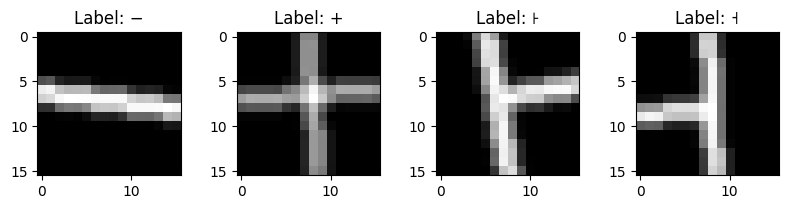

In [47]:
print("VISUALIZING THE DATA SET")
import matplotlib.pyplot as plt

##step 1
def visualize_data(x, y, pred=None):
    # Step 2
    n = len(x)
    
    # Step 3
    labels_list = ["\u2212", "\u002b", "\ua714", "\u02e7"]
    
    # Step 4
    fig, axes = plt.subplots(1, 4, figsize=(8, 2))  
    # Step 5
    for i in range(n):
        # Step 6
        axes[i].imshow(x[i], cmap='gray')
        
        # Step 7
        if pred is None:
            axes[i].set_title('Label: {}'.format(labels_list[y[i]]))  
        else:
            axes[i].set_title('Label: {}, Pred: {}'.format(labels_list[y[i]], labels_list[pred[i]])) 
    
    # Step 8
    plt.tight_layout(w_pad=2)
    plt.show()  # Added plt.show() to display the figure

# Example usage
visualize_data(x_vis, y_vis)






STEP 1
#1) 16x16 pixels
#2) the overall prection outcome will be predicted amongst the 4 classes 
(the 4 random classes that we have assinged)
#3) there will be 32 layers. More layers means more complex calculations
#4) ther will be 8 input qubits
#5) the number of times the data will be reuploaded so as in to rotate from classical data to quantum data

In [48]:
print("BUILDING THE QML CLASSIFIER CIRCUIT")

#step 1
input_dim = 256
num_classes = 4
num_layers = 32
num_qubits = 8
num_reup = 3

BUILDING THE QML CLASSIFIER CIRCUIT


while my GPU CUDA is installing, I will for now use CPU while I am aware that the running process will be slow, I will still use CPU just for learning purposes

In [49]:
#step 2
import torch
comp_processor = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("using device", comp_processor)

using device cpu


here we create a function called QML classifier because now we will be building a Quantum Classifier Model with our input torch.nn.Module

few arguements to be assgined
1) input_dim: dimensions of input samples
2) output_dim: number of output dimensions: typically assigned as the number of classes
3) num_qubits: number of qubits in a circuit
4) num_layers: number of layers within the strongly entanglling layers

#step 4: in step 4, first we create the def __init __function with our assigned attributes as self, input_dimensions (the dimension of the input samples), output_dim: (the dimension of the output, i.e. the numbers of classes), num_qubits (the number of qubits in the circuit), num_layers (the number of layers within the StronglyEntanglingLayers template). Here on, we also use a super init function where we include everything so this is why we arent segregating anything from def init function and super init funciton. torch.manual_seed(13337) this means that even if we were to run the code 13337 times, (obviously no one would but just to be safe), the overall output would remain the same

qml.qnode(self.device) this is like a quantum node (just like a quantum pointer, that will link between the quantum circuit and the pytorch layer)

#step 5: when building our quantum circuit, few key attributes that are in place are the inputs, typical input datas, weights (parameters or theta that control the quantum gate and bias, creates a shift or tweaks a little to a more favourable side)

#step 6: torch.reshape the reason we do that is to resize or reshape (maybe crops the image deacreases pixel whatever) so that the input data fits into the quanutm circuit. 

#step 7: equation for the regular neural network is weight = weight * input + bias where we multiply the weight value with the input value and tweak a little so as to favour towards one point by adding with bias value. With all those with wires ranging from 0 to num_qubits we add a "StronglyEntanglingLayers" so as to add trhose layers, meaning more mathematical copmlex formulas


#step 8: here for each of the output dimenstions, (so typically for each class) we will measure the average value in regards to pauli z operator because pauli Z consists of bit values 0 or 1 so it will typically collapse multiple solutions into either ket 0 or ket 1

In [50]:
class QML_Classifier(torch.nn.Module):
    """
    Step 1: Initialization of the QML_Classifier class
    Args:
        input_dim: the dimension of the input samples
        output_dim: the dimension of the output, i.e. the number of classes
        num_qubits: the number of qubits in the circuit
        num_layers: the number of layers within the StronglyEntanglingLayers template
    """
    
    # Step 2: Constructor (init) method
    def __init__(self, input_dim, output_dim, num_qubits, num_layers):
        super().__init__()
        torch.manual_seed(1337)  # Set seed for reproducibility
        
        # Step 3: Set class attributes
        self.output_dim = output_dim
        self.num_qubits = num_qubits
        self.num_layers = num_layers

        # Step 4: Define the quantum device
        self.device = qml.device("lightning.qubit", wires=self.num_qubits)

        # Step 5: Define the shape of the weights for the Strongly Entangling Layers
        self.weights_shape = qml.StronglyEntanglingLayers.shape(
            n_layers=self.num_layers, n_wires=self.num_qubits
        )

        # Step 6: Define the quantum circuit
        @qml.qnode(self.device)
        def circuit(inputs, weights, bias):
            # Step 7: Reshape the inputs to match the shape of the weights
            inputs = torch.reshape(inputs, self.weights_shape)
            
            # Step 8: Apply the Strongly Entangling Layers with input transformation and bias
            qml.StronglyEntanglingLayers(
                weights=weights * (inputs + bias), wires=range(self.num_qubits)
            )
            
            # Step 9: Measure the Pauli-Z expectation values for each qubit
            return [qml.expval(qml.PauliZ(i)) for i in range(self.output_dim)]

        # Step 10: Define the parameter shapes and initialize the parameters
        param_shapes = {"weights": self.weights_shape, "bias": self.weights_shape}
        init_vals = {
            "weights": 0.1 * torch.rand(self.weights_shape),
            "bias": 0.1 * torch.rand(self.weights_shape),
        }

        # Step 11: Initialize the quantum circuit with TorchLayer
        self.qcircuit = qml.qnn.TorchLayer(
            qnode=circuit, weight_shapes=param_shapes, init_method=init_vals
        )

    # Step 12: Define the forward pass for the model
    def forward(self, x):
        # Step 13: Re-upload inputs multiple times by stacking the input
        inputs_stack = torch.hstack([x] * 3)  # Re-upload the inputs 3 times
        
        # Step 14: Pass the stacked inputs to the quantum circuit
        return self.qcircuit(inputs_stack)





#Hyperparameters and Data Preparation

the learning_rate [0.1], epochs [4], and batch_szie [20] are relatively low values but only for learning purposes pennylane has assigned those values. However, the values are relativewly hgiher but given, even in my personal point of view, I would liek to compute it faster

In [51]:
#step 1
learning_rate = 0.1
epochs = 4
batch_size = 20

In [54]:
import numpy as np
import torch

feats_train = torch.from_numpy(X_train[:200]).reshape(200, -1).to(comp_processor)
feats_test = torch.from_numpy(X_test[:50]).reshape(50, -1).to(comp_processor)
label_train = torch.from_numpy(Y_train[:200]).to(comp_processor)
label_test = torch.from_numpy(Y_test[:50]).to(comp_processor)
num_train = feats_train.shape[0]